In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
from datetime import datetime

In [2]:
covid_df=pd.read_csv("covid_19_india.csv")
covid_df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [3]:
covid_df.shape

(18110, 9)

In [4]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18110 entries, 0 to 18109
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       18110 non-null  int64 
 1   Date                      18110 non-null  object
 2   Time                      18110 non-null  object
 3   State/UnionTerritory      18110 non-null  object
 4   ConfirmedIndianNational   18110 non-null  object
 5   ConfirmedForeignNational  18110 non-null  object
 6   Cured                     18110 non-null  int64 
 7   Deaths                    18110 non-null  int64 
 8   Confirmed                 18110 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.2+ MB


In [5]:
covid_df.describe()

,Sno,Cured,Deaths,Confirmed
count,18110.000000,1.811000e+04,18110.000000,1.811000e+04
mean,9055.500000,2.786375e+05,4052.402264,3.010314e+05
std,5228.051023,6.148909e+05,10919.076411,6.561489e+05
min,1.000000,0.000000e+00,0.000000,0.000000e+00
25%,4528.250000,3.360250e+03,32.000000,4.376750e+03
50%,9055.500000,3.336400e+04,588.000000,3.977350e+04
75%,13582.750000,2.788698e+05,3643.750000,3.001498e+05
max,18110.000000,6.159676e+06,134201.000000,6.363442e+06


## Pre processing the data


In [6]:
#creating a copy of dataframe
covid_df1=pd.DataFrame.copy(covid_df)

In [7]:
covid_df1.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [8]:
covid_df1.columns

Index(['Sno', 'Date', 'Time', 'State/UnionTerritory',
       'ConfirmedIndianNational', 'ConfirmedForeignNational', 'Cured',
       'Deaths', 'Confirmed'],
      dtype='object')

In [9]:
covid_df2=covid_df1.drop(['Sno','Time','ConfirmedIndianNational','ConfirmedForeignNational'],axis=1)

In [10]:
covid_df2.shape

(18110, 5)

In [11]:
covid_df2.head()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1
2,2020-02-01,Kerala,0,0,2
3,2020-02-02,Kerala,0,0,3
4,2020-02-03,Kerala,0,0,3


In [12]:
confirmed= covid_df['Confirmed'].sum()
cured = covid_df['Cured'].sum()
deaths= covid_df['Deaths'].sum()

print('Total Confirmed cases :',confirmed)
print('Total Cured cases :',cured)

print('Total Death cases :',deaths)

Total Confirmed cases : 5451678687
Total Cured cases : 5046125452
Total Death cases : 73389005


In [13]:
#finding the total number of active cases

covid_df2["Active_cases"]=covid_df2["Confirmed"]-(covid_df2['Cured']+ (covid_df2["Deaths"]))

In [14]:
covid_df2

,Date,State/UnionTerritory,Cured,Deaths,Confirmed,Active_cases
0,2020-01-30,Kerala,0,0,1,1
1,2020-01-31,Kerala,0,0,1,1
2,2020-02-01,Kerala,0,0,2,2
3,2020-02-02,Kerala,0,0,3,3
4,2020-02-03,Kerala,0,0,3,3
...,...,...,...,...,...,...
18105,2021-08-11,Telangana,638410,3831,650353,8112
18106,2021-08-11,Tripura,77811,773,80660,2076
18107,2021-08-11,Uttarakhand,334650,7368,342462,444
18108,2021-08-11,Uttar Pradesh,1685492,22775,1708812,545


In [15]:
covid_df2.isnull().sum()
#we dont have any null values

Date                    0
State/UnionTerritory    0
Cured                   0
Deaths                  0
Confirmed               0
Active_cases            0
dtype: int64

In [16]:
covid_df2['State/UnionTerritory'].unique()

array(['Kerala', 'Telengana', 'Delhi', 'Rajasthan', 'Uttar Pradesh',
       'Haryana', 'Ladakh', 'Tamil Nadu', 'Karnataka', 'Maharashtra',
       'Punjab', 'Jammu and Kashmir', 'Andhra Pradesh', 'Uttarakhand',
       'Odisha', 'Puducherry', 'West Bengal', 'Chhattisgarh',
       'Chandigarh', 'Gujarat', 'Himachal Pradesh', 'Madhya Pradesh',
       'Bihar', 'Manipur', 'Mizoram', 'Andaman and Nicobar Islands',
       'Goa', 'Unassigned', 'Assam', 'Jharkhand', 'Arunachal Pradesh',
       'Tripura', 'Nagaland', 'Meghalaya',
       'Dadra and Nagar Haveli and Daman and Diu',
       'Cases being reassigned to states', 'Sikkim', 'Daman & Diu',
       'Lakshadweep', 'Telangana', 'Dadra and Nagar Haveli', 'Bihar****',
       'Madhya Pradesh***', 'Himanchal Pradesh', 'Karanataka',
       'Maharashtra***'], dtype=object)

In [17]:
#for i in covid_df2.columns:
#    print({i:covid_df2[i].unique()}) # here we are manually check is their any special characters in dataset 

In [18]:
covid_df2=covid_df2.replace('Telengana','Telangana')
covid_df2=covid_df2.replace('Maharashtra***','Maharashtra')
covid_df2=covid_df2.replace('Bihar****','Bihar')
covid_df2=covid_df2.replace('Himanchal Pradesh','Himachal Pradesh')
covid_df2=covid_df2.replace('Madhya Pradesh***','Madhya Pradesh')
covid_df2=covid_df2.replace('Chandigarh***','Chandigarh')
covid_df2=covid_df2.replace('Dadra and Nagar Haveli','Dadra and Nagar Haveli and Daman and Diu')
covid_df2=covid_df2.replace('Daman & Diu','Dadra and Nagar Haveli and Daman and Diu')

In [19]:
covid_df2=covid_df2.replace('Karanataka','Karnataka')

In [20]:
invalid_states = ["Cases being reassigned to states", "Unassigned"]

for invalid_state in invalid_states:
    invalid_state_index = covid_df2.loc[covid_df2["State/UnionTerritory"] == invalid_state, :].index
    covid_df2.drop(index = invalid_state_index, inplace = True)

# Replacing the incorrect values with the correct ones.
for index in covid_df2.index:
    if "*" in covid_df2.loc[index, "State/UnionTerritory"]:
        covid_df2.loc[index, "State/UnionTerritory"] = covid_df2.loc[index, "State/UnionTerritory"].replace("*", "")

covid_df2["State/UnionTerritory"] = covid_df2["State/UnionTerritory"].replace({
    "Karanataka": "Karnataka",
    "Telangana": "Telengana",
    "Himanchal Pradesh": "Himachal Pradesh",
    "Dadra and Nagar Haveli": "Dadra and Nagar Haveli and Daman and Diu",
    "Daman & Diu": "Dadra and Nagar Haveli and Daman and Diu"
    })


In [21]:
covid_df2['State/UnionTerritory'].unique()

array(['Kerala', 'Telangana', 'Delhi', 'Rajasthan', 'Uttar Pradesh',
       'Haryana', 'Ladakh', 'Tamil Nadu', 'Karnataka', 'Maharashtra',
       'Punjab', 'Jammu and Kashmir', 'Andhra Pradesh', 'Uttarakhand',
       'Odisha', 'Puducherry', 'West Bengal', 'Chhattisgarh',
       'Chandigarh', 'Gujarat', 'Himachal Pradesh', 'Madhya Pradesh',
       'Bihar', 'Manipur', 'Mizoram', 'Andaman and Nicobar Islands',
       'Goa', 'Assam', 'Jharkhand', 'Arunachal Pradesh', 'Tripura',
       'Nagaland', 'Meghalaya',
       'Dadra and Nagar Haveli and Daman and Diu', 'Sikkim',
       'Lakshadweep'], dtype=object)

In [22]:
covid_df2['State/UnionTerritory']

0               Kerala
1               Kerala
2               Kerala
3               Kerala
4               Kerala
             ...      
18105        Telangana
18106          Tripura
18107      Uttarakhand
18108    Uttar Pradesh
18109      West Bengal
Name: State/UnionTerritory, Length: 18047, dtype: object

In [23]:
covid_df2['State/UnionTerritory'].unique()

array(['Kerala', 'Telangana', 'Delhi', 'Rajasthan', 'Uttar Pradesh',
       'Haryana', 'Ladakh', 'Tamil Nadu', 'Karnataka', 'Maharashtra',
       'Punjab', 'Jammu and Kashmir', 'Andhra Pradesh', 'Uttarakhand',
       'Odisha', 'Puducherry', 'West Bengal', 'Chhattisgarh',
       'Chandigarh', 'Gujarat', 'Himachal Pradesh', 'Madhya Pradesh',
       'Bihar', 'Manipur', 'Mizoram', 'Andaman and Nicobar Islands',
       'Goa', 'Assam', 'Jharkhand', 'Arunachal Pradesh', 'Tripura',
       'Nagaland', 'Meghalaya',
       'Dadra and Nagar Haveli and Daman and Diu', 'Sikkim',
       'Lakshadweep'], dtype=object)

In [24]:
statewise=pd.pivot_table(covid_df2,values=["Confirmed","Deaths","Cured"],
                              index="State/UnionTerritory",aggfunc=max)

In [25]:
#recovery rate
statewise["recovery_rate"]=statewise["Cured"]*100/statewise["Confirmed"]

In [26]:
#mortality rate
statewise["mortality_rate"]=statewise["Deaths"]*100/statewise["Confirmed"]

In [27]:
#Now we are going to sort the vlaues based on the confirmed cases column & we will sort it in a descending order

statewise=statewise.sort_values(by="Confirmed",ascending=False)

In [28]:
statewise.style.background_gradient(cmap='magma')

,Confirmed,Cured,Deaths,recovery_rate,mortality_rate
State/UnionTerritory,,,,,
Maharashtra,6363442,6159676,134201,96.797865,2.108937
Kerala,3586693,3396184,18004,94.688450,0.501967
Karnataka,2921049,2861499,36848,97.961349,1.261465
Tamil Nadu,2579130,2524400,34367,97.877967,1.332504
Andhra Pradesh,1985182,1952736,13564,98.365591,0.683262
Uttar Pradesh,1708812,1685492,22775,98.635309,1.332797
West Bengal,1534999,1506532,18252,98.145471,1.189056
Delhi,1436852,1411280,25068,98.220276,1.744647
Chhattisgarh,1003356,988189,13544,98.488373,1.349870


- our data says that maharashtra has the highest number of cases followed by the kerala, karnataka ,tamil nadu ,AP & UP so these are the top five 5 staes which have the hihest numbers of confirmed cases.
- Even if you see the mortality rate is also high for maharashtra,uttarakhand and punjab

In [29]:
covid_df2.columns

Index(['Date', 'State/UnionTerritory', 'Cured', 'Deaths', 'Confirmed',
       'Active_cases'],
      dtype='object')

In [30]:
#top states based on the number of active cases

top_active_states=covid_df2.groupby(by="State/UnionTerritory").max()[["Active_cases",'Date']].sort_values(by=["Active_cases"],ascending=False).reset_index()
top_active_states

,State/UnionTerritory,Active_cases,Date
0,Maharashtra,701614,2021-08-11
1,Karnataka,605515,2021-08-11
2,Kerala,445692,2021-08-11
3,Tamil Nadu,313048,2021-08-11
4,Uttar Pradesh,310783,2021-08-11
5,Rajasthan,212753,2021-08-11
6,Andhra Pradesh,211554,2021-08-11
7,Gujarat,148297,2021-08-11
8,West Bengal,132181,2021-08-11
9,Chhattisgarh,131245,2021-08-11


<AxesSubplot:title={'center':'Top 10 states with most active cases'}, xlabel='State/UnionTerritory', ylabel='Active_cases'>

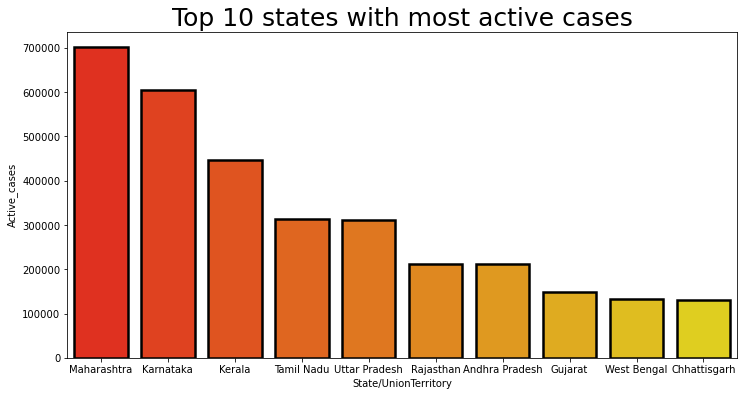

In [31]:
fig =plt.figure(figsize=(12,6))
plt.title("Top 10 states with most active cases",size=25)
sns.barplot(x='State/UnionTerritory',y='Active_cases',
            data=top_active_states.iloc[:10],linewidth=2.5,edgecolor="black",palette='autumn')

In [32]:
#top states with highest deaths
top_death_case=covid_df2.groupby(by="State/UnionTerritory").max()[["Deaths",'Date']].sort_values(by=["Deaths"],ascending=False).reset_index()    
top_death_case

,State/UnionTerritory,Deaths,Date
0,Maharashtra,134201,2021-08-11
1,Karnataka,36848,2021-08-11
2,Tamil Nadu,34367,2021-08-11
3,Delhi,25068,2021-08-11
4,Uttar Pradesh,22775,2021-08-11
5,West Bengal,18252,2021-08-11
6,Kerala,18004,2021-08-11
7,Punjab,16322,2021-08-11
8,Andhra Pradesh,13564,2021-08-11
9,Chhattisgarh,13544,2021-08-11


<AxesSubplot:title={'center':'Top 10 states with most deaths'}, xlabel='State/UnionTerritory', ylabel='Deaths'>

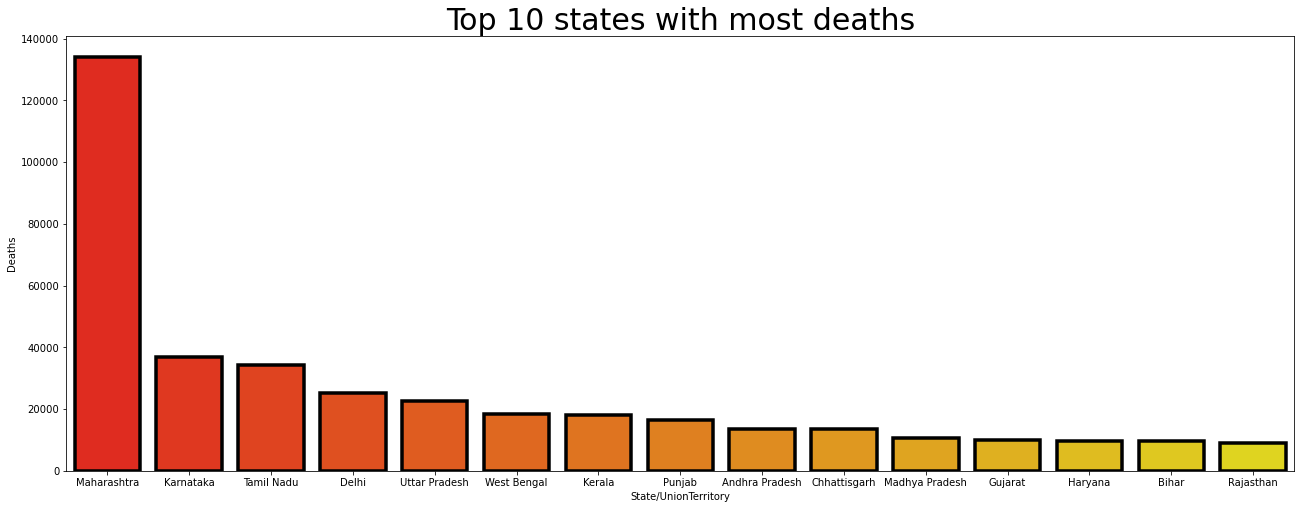

In [33]:
fig =plt.figure(figsize=(22,8))
plt.title("Top 10 states with most deaths",size=30)
sns.barplot(x='State/UnionTerritory',y='Deaths',
            data=top_death_case.iloc[:15],linewidth=3.5,edgecolor="black",palette='autumn')

Text(0.5, 1.0, 'Top 5 Affected States in India')

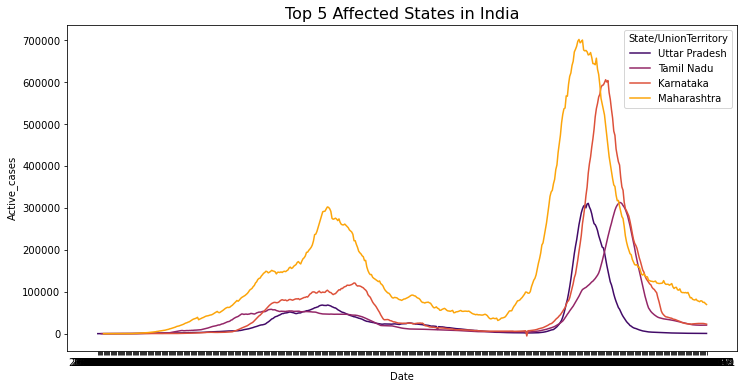

In [34]:
#now we'll create a line plot to see the growth or the trend of active cases
#for top 5 states with most number of confirmed cases

fig = plt.figure(figsize=(12,6))
ax = sns.lineplot(data = covid_df2[covid_df2['State/UnionTerritory'].isin(['Maharashtra','Karnataka','Kerela','Tamil Nadu','Uttar Pradesh'])],x='Date',y='Active_cases',hue = 'State/UnionTerritory',palette='inferno')

ax.set_title("Top 5 Affected States in India",size = 16)



In [35]:
vaccine_df=pd.read_csv('covid_vaccine_statewise.csv')
vaccine_df.head()

,Updated On,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0


In [36]:
vaccine_df.shape

(7845, 24)

## Pre processing the data

In [37]:
#creating a copy of dataframe
vaccination_df=pd.DataFrame.copy(vaccine_df)

In [38]:
vaccination_df.shape

(7845, 24)

In [39]:
vaccination_df.info

<bound method DataFrame.info of       Updated On        State  Total Doses Administered  Sessions   Sites   \
0     16/01/2021        India                   48276.0    3455.0   2957.0   
1     17/01/2021        India                   58604.0    8532.0   4954.0   
2     18/01/2021        India                   99449.0   13611.0   6583.0   
3     19/01/2021        India                  195525.0   17855.0   7951.0   
4     20/01/2021        India                  251280.0   25472.0  10504.0   
...          ...          ...                       ...       ...      ...   
7840  11/08/2021  West Bengal                       NaN       NaN      NaN   
7841  12/08/2021  West Bengal                       NaN       NaN      NaN   
7842  13/08/2021  West Bengal                       NaN       NaN      NaN   
7843  14/08/2021  West Bengal                       NaN       NaN      NaN   
7844  15/08/2021  West Bengal                       NaN       NaN      NaN   

      First Dose Administered  

In [40]:
vaccination_df.isnull().sum()

Updated On                                0
State                                     0
Total Doses Administered                224
Sessions                                224
 Sites                                  224
First Dose Administered                 224
Second Dose Administered                224
Male (Doses Administered)               384
Female (Doses Administered)             384
Transgender (Doses Administered)        384
 Covaxin (Doses Administered)           224
CoviShield (Doses Administered)         224
Sputnik V (Doses Administered)         4850
AEFI                                   2407
18-44 Years (Doses Administered)       6143
45-60 Years (Doses Administered)       6143
60+ Years (Doses Administered)         6143
18-44 Years(Individuals Vaccinated)    4112
45-60 Years(Individuals Vaccinated)    4111
60+ Years(Individuals Vaccinated)      4111
Male(Individuals Vaccinated)           7685
Female(Individuals Vaccinated)         7685
Transgender(Individuals Vaccinat

In [41]:
# Drops some columns
vaccination = vaccination_df.drop(columns = ['Sputnik V (Doses Administered)','AEFI','18-44 Years (Doses Administered)','45-60 Years (Doses Administered)','60+ Years (Doses Administered)'],axis=1)

In [42]:
vaccination.head()

,Updated On,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),Covaxin (Doses Administered),CoviShield (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,579.0,47697.0,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,635.0,57969.0,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,1299.0,98150.0,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,3017.0,192508.0,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,3946.0,247334.0,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0


In [43]:
male = vaccination['Male(Individuals Vaccinated)'].sum()
male


7138698858.0

In [44]:
female = vaccination['Female(Individuals Vaccinated)'].sum()
female

6321628736.0

In [45]:
Transgender= vaccination['Transgender (Doses Administered)'].sum()
Transgender

8676979.0

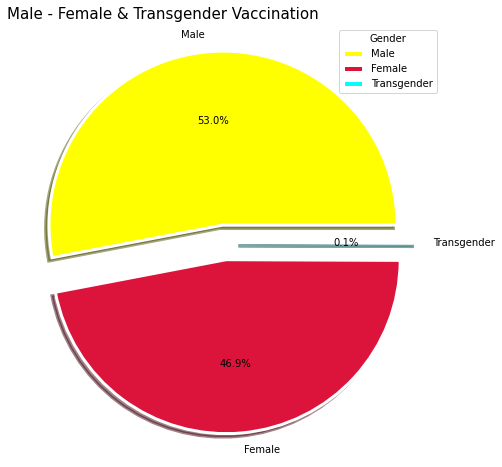

In [46]:

values=[male,female,Transgender]
names = ['Male','Female','Transgender']
explode = [0.1,0.1,0.1]
colors = ("yellow","crimson","cyan",)
plt.figure(figsize=(16,8))
plt.pie(values,labels=names,autopct='%1.1f%%',explode=explode,colors=colors,shadow=True,wedgeprops = {'linewidth': 3,'edgecolor':'white'})
plt.legend(title = "Gender")
plt.title('Male - Female & Transgender Vaccination',loc='left',color="black",fontsize='15')
plt.show()

In [47]:
# Removies row where state = India
covid_vaccine= vaccination_df[vaccination_df.State !='India']
covid_vaccine.head()

,Updated On,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
212,16/01/2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0
213,17/01/2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0
214,18/01/2021,Andaman and Nicobar Islands,42.0,9.0,2.0,42.0,0.0,29.0,13.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.0
215,19/01/2021,Andaman and Nicobar Islands,89.0,12.0,2.0,89.0,0.0,53.0,36.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.0
216,20/01/2021,Andaman and Nicobar Islands,124.0,16.0,3.0,124.0,0.0,67.0,57.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,124.0


In [48]:
#highest 5 states vaccinated
max_vac = covid_vaccine.groupby('State')['Total Individuals Vaccinated'].sum().to_frame('Total Individuals Vaccinated')
max_vac = max_vac.sort_values('Total Individuals Vaccinated',ascending = False)
max_vac.head()

,Total Individuals Vaccinated
State,
Maharashtra,1.403075e+09
Uttar Pradesh,1.200575e+09
Rajasthan,1.141163e+09
Gujarat,1.078261e+09
West Bengal,9.250227e+08


In [49]:
#lowest 5 states vaccinated
min_vac = covid_vaccine.groupby('State')['Total Individuals Vaccinated'].sum().to_frame('Total Individuals Vaccinated')
min_vac = min_vac.sort_values('Total Individuals Vaccinated',ascending = False)
min_vac.tail()

,Total Individuals Vaccinated
State,
Sikkim,16136752.0
Dadra and Nagar Haveli and Daman and Diu,11358600.0
Ladakh,9466289.0
Andaman and Nicobar Islands,8102125.0
Lakshadweep,2124715.0
